## IndabaX2021: Water Portability Classification Hackathon (1st winning solution)

### Import neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

Loading the data

In [4]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')

In [5]:
train.head(n=5)

,region_area_,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,region_area_1,3.716080,180.196811,18630.362669,6.330435,NaN,602.990359,15.285013,56.444076,4.500656,0
1,region_area_100,4.270716,217.611599,24405.555346,7.086700,297.951852,359.623910,13.583526,54.589840,3.763906,0
2,region_area_1000,6.648849,232.462013,30733.808648,5.656462,344.670335,267.809179,17.863444,35.411181,4.827527,0
3,region_area_1001,NaN,261.753637,21174.713291,7.314074,NaN,582.848407,15.215849,90.367455,4.217553,0
4,region_area_1002,9.323584,263.484560,15751.480111,5.196259,297.593625,409.878704,10.727265,74.669285,3.006650,0


In [6]:
test.head(n=5)

,region_area_,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,region_area_0,NaN,255.664346,20791.623791,6.995401,369.261555,574.413654,10.484783,87.105970,2.963135
1,region_area_10,7.360640,216.294688,32452.919220,7.245890,327.369467,435.488419,15.691810,78.855016,3.662292
2,region_area_1006,7.230845,228.348694,17864.994196,5.513418,344.338446,377.794992,20.017950,59.418053,5.622018
3,region_area_1010,4.797460,241.089018,21280.551369,5.883692,327.539307,367.541193,11.818821,63.978068,4.038503
4,region_area_1011,9.319176,250.107456,14294.545161,7.480130,366.796865,348.546450,15.320293,63.506468,4.129230


In [7]:
#check shape of train and test sets
train.shape, test.shape

((2260, 11), (1016, 10))

In [8]:
# check train info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260 entries, 0 to 2259
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region_area_     2260 non-null   object 
 1   ph               1924 non-null   float64
 2   Hardness         2260 non-null   float64
 3   Solids           2260 non-null   float64
 4   Chloramines      2260 non-null   float64
 5   Sulfate          1713 non-null   float64
 6   Conductivity     2260 non-null   float64
 7   Organic_carbon   2260 non-null   float64
 8   Trihalomethanes  2149 non-null   float64
 9   Turbidity        2260 non-null   float64
 10  Potability       2260 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 194.3+ KB


In [9]:
# check quick statistics of train set
train.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1924.000000,2260.000000,2260.000000,2260.000000,1713.000000,2260.000000,2260.000000,2149.000000,2260.000000,2260.000000
mean,7.083561,247.000935,22100.926521,6.802715,334.601013,436.572437,14.359075,66.440129,3.969176,0.388496
std,1.596243,33.162065,8829.474740,1.592352,42.216115,80.645313,3.298100,16.321315,0.777228,0.487516
min,0.000000,124.266124,321.247422,0.047189,129.745113,211.724737,4.476899,0.853000,1.450000,0.000000
25%,6.114364,226.799112,15761.393491,5.800652,307.637713,376.894507,12.154291,55.918503,3.444178,0.000000
50%,7.060886,247.379235,21149.453853,6.828266,333.943304,432.813965,14.325645,66.727984,3.962502,0.000000
75%,8.045673,267.798367,27347.271380,7.802569,361.159118,492.076858,16.625857,77.488813,4.502519,1.000000
max,13.541240,373.897891,61227.500818,12.822189,481.775755,718.331364,28.405000,124.115000,6.739000,1.000000


In [10]:
train['region_area_'].nunique()

2260

<AxesSubplot:xlabel='Potability', ylabel='count'>

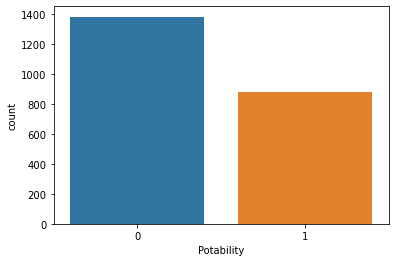

In [11]:
sns.countplot(train['Potability'])

<AxesSubplot:>

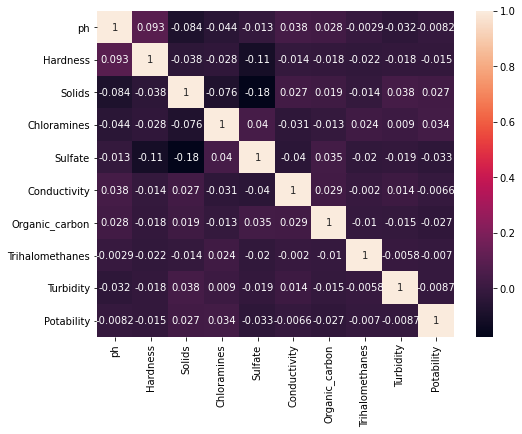

In [12]:
# plt a heatmap from the correlation matrix of the data
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(),annot=True)

In [13]:
from scipy.stats import mode
from tqdm.std import tqdm

def cross_validate(model,train_set,target,test_set,fold=3, random_state=42):
    """
    run a cross validation on the data and preidcts on the test set. 
    model: insatntiated classfier
    train_set: training set that is splitted and cross validated (it does not contain th target)
    target: target column for training and splitted for validation
    fold: number of n_splits to pass to KFold
    random_state: seed to set for KFold
    """
    # n_splits x number of test rows, most frequent prediction will b taken accross the first axis (n_splits)
    # test predictions are stored here
    test_preds = np.zeros((fold,test_set.shape[0]))
    
    # train prediction are stored here
    train_preds = np.zeros(train_set.shape[0])
    val_scores = []
    kfold = KFold(n_splits=fold, random_state=random_state, shuffle=True)
    
    # making sure the trainin set is a dataframe and the target is a pandas Series
    assert type(train_set) == pd.DataFrame and type(target) == pd.Series
    
    # tqdm just for decorating the iteration process. displays a progressor bar of the iteration
    for i, (train_index,test_index) in tqdm(enumerate(kfold.split(train_set,target)),desc='Running KFold Validation'):
    
        x_train, y_train = train_set.iloc[train_index], target.iloc[train_index] # get the train-target set
        x_test, y_test = train_set.iloc[test_index], target.iloc[test_index] # get the validation and test target set
        
        model.fit(x_train,y_train)
        train_preds[train_index] = model.predict(x_train)
        val_preds = model.predict(x_test)
        
        train_score = f1_score(y_train,train_preds[train_index])
        val_score = f1_score(y_test,val_preds)
        val_scores.append(val_score)
        print('Training Score:>', train_score)
        print('Validation Score:>', val_score)
        
        # predict on the test set and save each predictons made at each run of the splits
        test_preds[i] = model.predict(test_set)
        
    print('\n Overal train score:>', f1_score(target,train_preds))
    print('Average validation score', np.mean(val_scores))
    # get the modal predictions accorss each splits (first axis) with the mode function of scipy.stats
    predictions = mode(test_preds)[0][0] 
    
    return train_preds, predictions

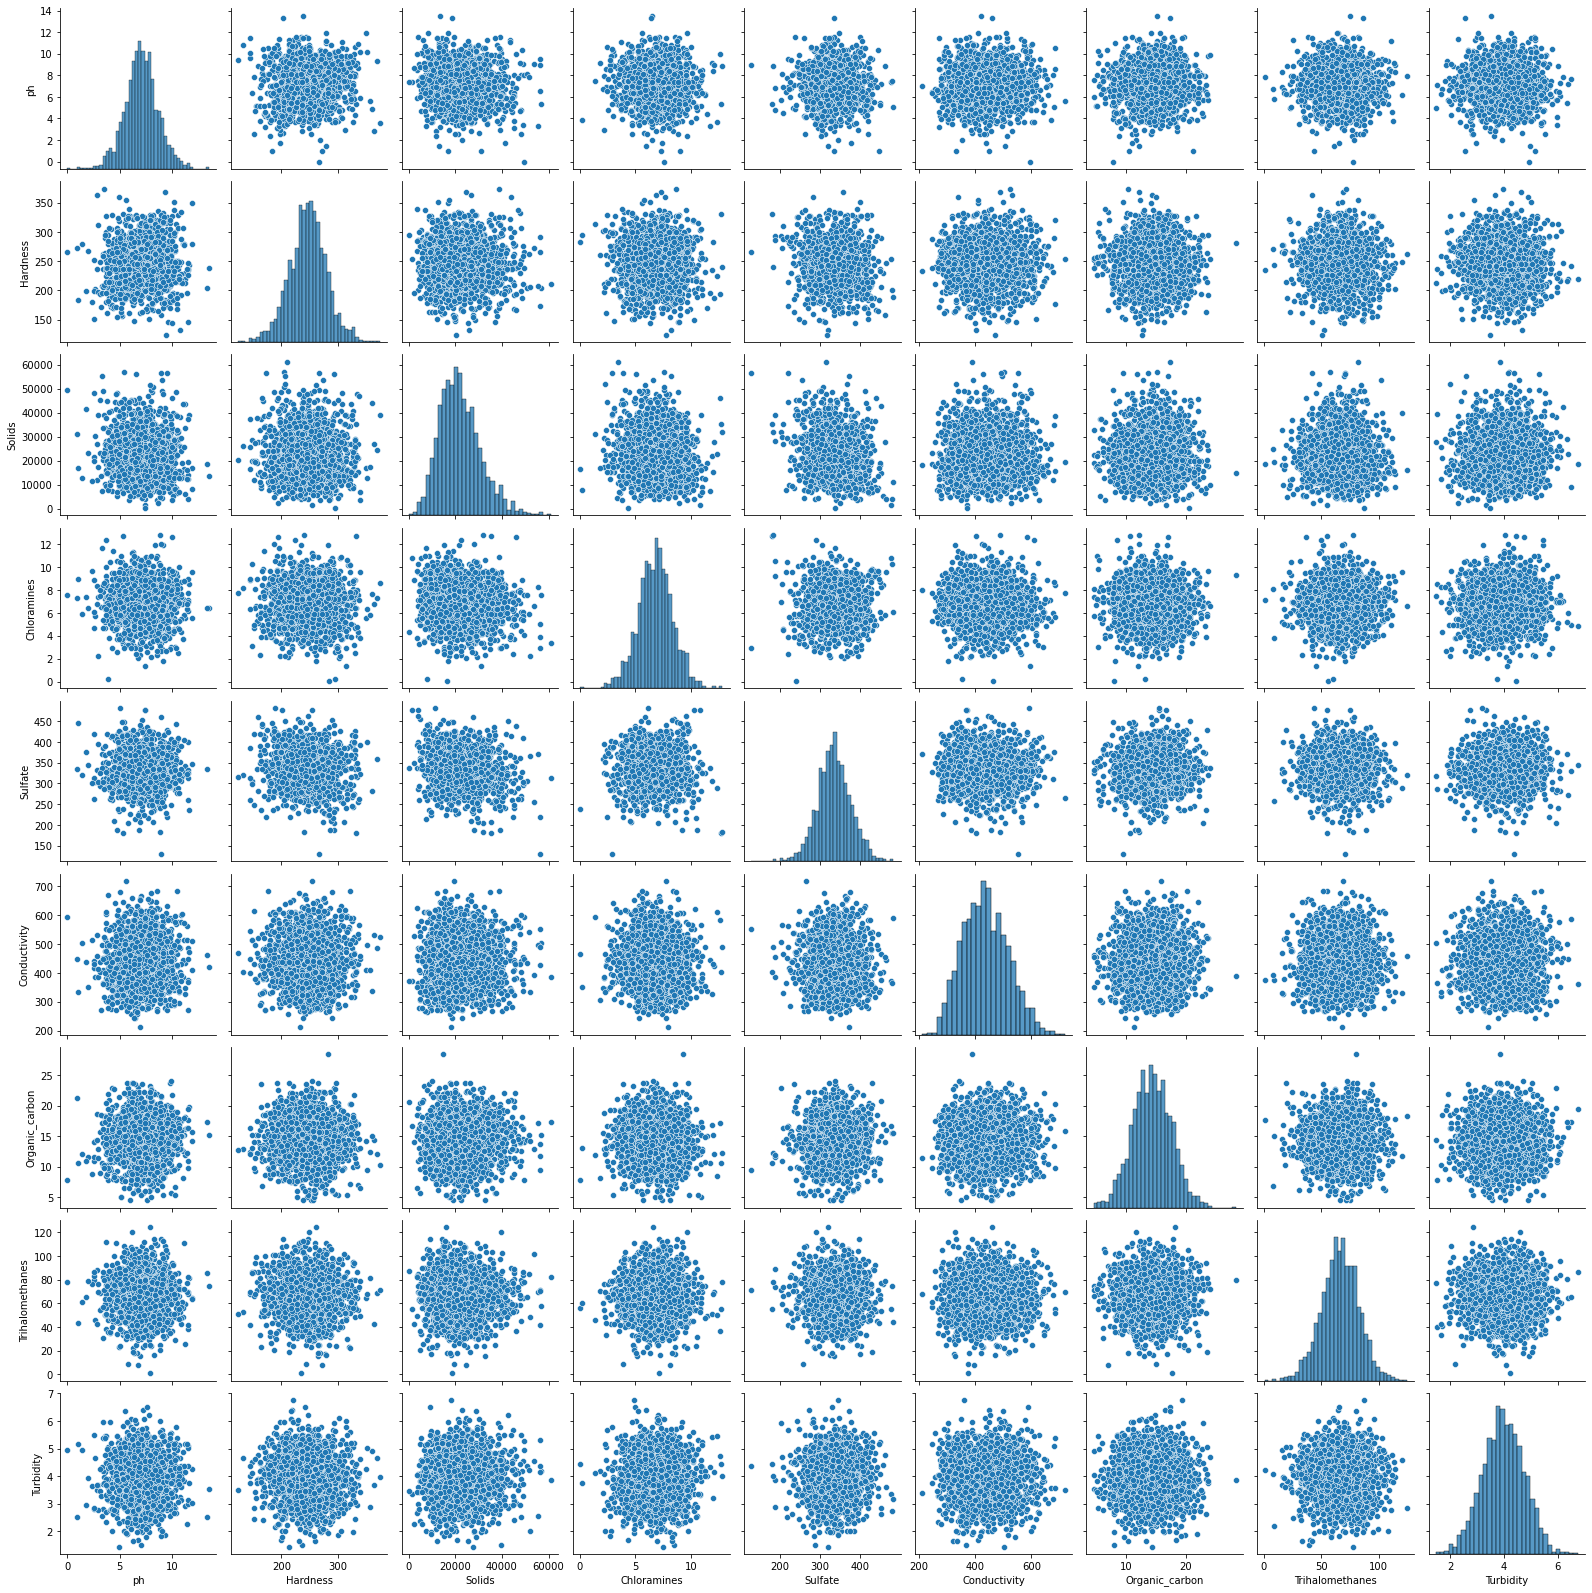

In [14]:
sns.pairplot(train.drop(['region_area_','Potability'], axis=1))

In [15]:

import math
def flag(df,batch=410,ratio=0.61):
    """
    flags is a water is likely to be portable or not base on the region it came from.
    """
    df_copy = df.copy()
    zero_group = math.floor(0.61 * 410)
    one_group = math.ceil(410-zero_group)
    size = batch
    flags = np.zeros(df.shape[0])
    for pos in range(0,df.shape[0],size):
        flags[pos:pos+zero_group] = 0
        flags[pos+zero_group:pos+zero_group+one_group] = 1 
    return flags

In [16]:
data = pd.concat([train,test])
ntrain = train.shape[0]

In [17]:
# extracts the region number
l = len('region_area_')
data['region_no'] = data['region_area_'].apply(lambda val: val[l:]).astype(int)
data = data.sort_values('region_no')

In [18]:
data['Potability_flag'] = flag(data)

In [19]:
data[['region_no','Potability','Potability_flag']]

,region_no,Potability,Potability_flag
0,0,NaN,0.0
0,1,0.0,0.0
769,2,0.0,0.0
1548,3,0.0,0.0
1813,4,0.0,0.0
...,...,...,...
1758,3271,1.0,1.0
768,3272,NaN,1.0
1759,3273,1.0,1.0
1760,3274,1.0,1.0


In [20]:
# separating back the train data and test data base on region area
temp_data = data[['region_area_','Potability_flag']].copy()
flagged_train = pd.merge(train,temp_data, how='left') # this allows only rows with match on the train data to be kept
flagged_test = pd.merge(test,temp_data, how='left') # this allows only row on with macth on the test data to be kept

In [21]:
train_data = flagged_train.drop(['region_area_','Potability'], axis=1) # dropping columns and getting the trainable data
test_data = flagged_test.drop('region_area_', axis=1) # geting the predictable data
target = flagged_train.Potability # get the target

In [22]:
# fill missing value with mean
impute = SimpleImputer(strategy='mean')
train_data = pd.DataFrame(impute.fit_transform(train_data), columns=train_data.columns)
test_data = pd.DataFrame(impute.transform(test_data), columns=test_data.columns)

In [23]:
train_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability_flag
0,3.716080,180.196811,18630.362669,6.330435,334.601013,602.990359,15.285013,56.444076,4.500656,0.0
1,4.270716,217.611599,24405.555346,7.086700,297.951852,359.623910,13.583526,54.589840,3.763906,0.0
2,6.648849,232.462013,30733.808648,5.656462,344.670335,267.809179,17.863444,35.411181,4.827527,0.0
3,7.083561,261.753637,21174.713291,7.314074,334.601013,582.848407,15.215849,90.367455,4.217553,0.0
4,9.323584,263.484560,15751.480111,5.196259,297.593625,409.878704,10.727265,74.669285,3.006650,0.0


In [24]:
test_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability_flag
0,7.083561,255.664346,20791.623791,6.995401,369.261555,574.413654,10.484783,87.105970,2.963135,0.0
1,7.360640,216.294688,32452.919220,7.245890,327.369467,435.488419,15.691810,78.855016,3.662292,0.0
2,7.230845,228.348694,17864.994196,5.513418,344.338446,377.794992,20.017950,59.418053,5.622018,0.0
3,4.797460,241.089018,21280.551369,5.883692,327.539307,367.541193,11.818821,63.978068,4.038503,0.0
4,9.319176,250.107456,14294.545161,7.480130,366.796865,348.546450,15.320293,63.506468,4.129230,0.0


In [25]:
test_data.shape, train_data.shape, target.shape

((1016, 10), (2260, 10), (2260,))

#### Training the model

In [26]:
xgb = XGBClassifier(random_state=3)
val_preds, prreds = cross_validate(xgb,train_data,target,test_data,fold=5)

Running KFold Validation: 0it [00:00, ?it/s]

[14:56:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Running KFold Validation: 1it [00:07,  7.76s/it]

Training Score:> 1.0
Validation Score:> 1.0
[14:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Running KFold Validation: 2it [00:08,  3.74s/it]

Training Score:> 0.9985611510791367
Validation Score:> 0.9945054945054945
[14:57:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Running KFold Validation: 3it [00:09,  2.30s/it]

Training Score:> 0.9992821249102656
Validation Score:> 0.994475138121547
[14:57:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Running KFold Validation: 4it [00:09,  1.65s/it]

Training Score:> 1.0
Validation Score:> 1.0
[14:57:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Running KFold Validation: 5it [00:11,  2.34s/it]

Training Score:> 1.0
Validation Score:> 0.9971014492753623

 Overal train score:> 1.0
Average validation score 0.9972164163804808


##### Submission

In [27]:
ss.Potability = prreds
ss.to_csv('submission_xgb-final.csv', index=False)

<AxesSubplot:xlabel='Potability', ylabel='count'>

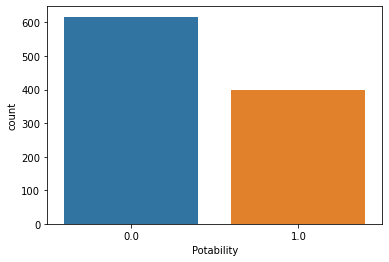

In [28]:
sns.countplot(ss.Potability)